In [ ]:
# Dataset
# https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, date
import datetime

def days_ago(booking, n):
  difference = timedelta(days=n)
  return booking - difference


df = pd.read_csv("hotel_bookings.csv")
original = df.copy()
df.head()






,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe()

original.describe()

print(original.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [ ]:
df['deposit_type'] = df['deposit_type'].replace('No Deposit', 0)
df['deposit_type'] = df['deposit_type'].replace('Non Refund', 1)
df['deposit_type'] = df['deposit_type'].replace('Refundable', 2)
#no deposit = 0
#non refund = 1
#refundable = 2

df['reservation_status'] = df['reservation_status'].replace('Check-Out', 0)
df['reservation_status'] = df['reservation_status'].replace('Canceled', 1)
df['reservation_status'] = df['reservation_status'].replace('No-Show', 2)
#Check Out = 0
#Canceled = 1
#No-Show = 2

df['hotel'] = df['hotel'].replace('City Hotel', 0)
df['hotel'] = df['hotel'].replace('Resort Hotel', 1)
# City Hotel = 0
#Resort Hotel = 1

df['customer_type'] = df['customer_type'].replace('Transient', 0)
df['customer_type'] = df['customer_type'].replace('Transient-Party', 1)
df['customer_type'] = df['customer_type'].replace('Contract', 2)
df['customer_type'] = df['customer_type'].replace('Group', 3)
#Transient = 0
#Transient-Party = 1
#Contract = 2
#Group = 3

df['arrival_date_month']= df['arrival_date_month'].replace('January', 1)
df['arrival_date_month']= df['arrival_date_month'].replace('February', 2)
df['arrival_date_month']= df['arrival_date_month'].replace('March', 3)
df['arrival_date_month']= df['arrival_date_month'].replace('April', 4)
df['arrival_date_month']= df['arrival_date_month'].replace('May', 5)
df['arrival_date_month']= df['arrival_date_month'].replace('June', 6)


df['arrival_date_month']= df['arrival_date_month'].replace('July', 7)
df['arrival_date_month']= df['arrival_date_month'].replace('August', 8)
df['arrival_date_month']= df['arrival_date_month'].replace('September', 9)
df['arrival_date_month']= df['arrival_date_month'].replace('October', 10)
df['arrival_date_month']= df['arrival_date_month'].replace('November', 11)
df['arrival_date_month']= df['arrival_date_month'].replace('December', 12)

df['date_booked'] = df['arrival_date_year']
df['booked_on'] = df['arrival_date_year']

for x in range(len(df)):
  df['date_booked'][x] = date(df['arrival_date_year'][x], df['arrival_date_month'][x], df['arrival_date_day_of_month'][x])
  df['booked_on'][x] = days_ago(df['date_booked'][x], int(df['lead_time'][x]))


df.drop(['meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'agent',  'company', 'required_car_parking_spaces',  'total_of_special_requests', 'reservation_status_date'], axis=1, inplace=True)

df_noDates = df.copy()

df_noDates.drop(['date_booked', 'booked_on'], axis=1, inplace=True)


<ipython-input-3-84cae839af2f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['deposit_type'] = df['deposit_type'].replace('Refundable', 2)
<ipython-input-3-84cae839af2f>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['reservation_status'] = df['reservation_status'].replace('No-Show', 2)
<ipython-input-3-84cae839af2f>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

<Axes: >

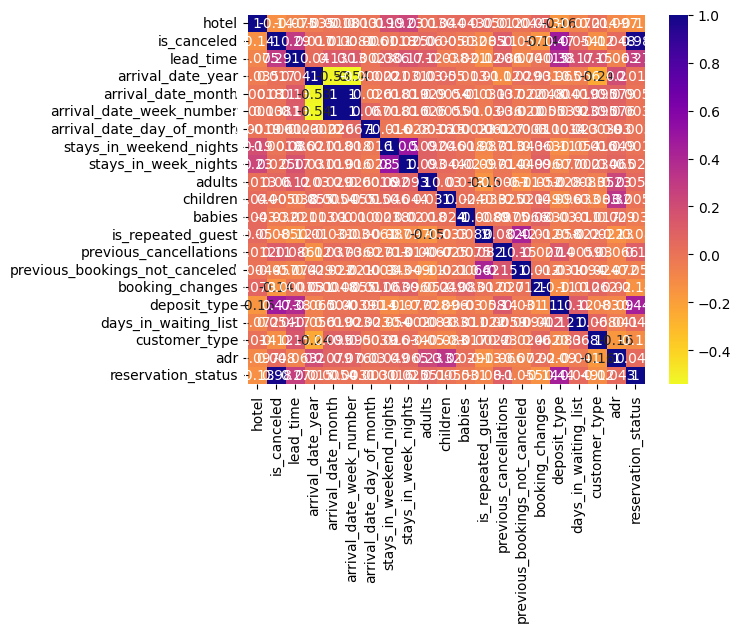

In [ ]:
sns.heatmap(df_noDates.corr(), annot=True,cmap='plasma_r') # needs cleaning

In [ ]:
# 34 second runtime, edit back in as needed
# print(df.to_string())

In [ ]:
correlation_matrix = df_noDates.corr()

# Get the correlation with 'is_canceled'
correlation_with_is_canceled = correlation_matrix['is_canceled'].drop('is_canceled')

print(correlation_with_is_canceled)

hotel                            -0.136531
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_month                0.011022
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
deposit_type                      0.468634
days_in_waiting_list              0.054186
customer_type                    -0.121862
adr                               0.047557
reservation_status                0.980601
Name: is_canceled, dtype: float64


In [ ]:
# Sort by absolute value of correlation
top_correlated_variables = correlation_with_is_canceled.abs().sort_values(ascending=False)

# top five variables
top_five_variables = top_correlated_variables.head(5)

print(top_five_variables)

reservation_status    0.980601
deposit_type          0.468634
lead_time             0.293123
booking_changes       0.144381
hotel                 0.136531
Name: is_canceled, dtype: float64


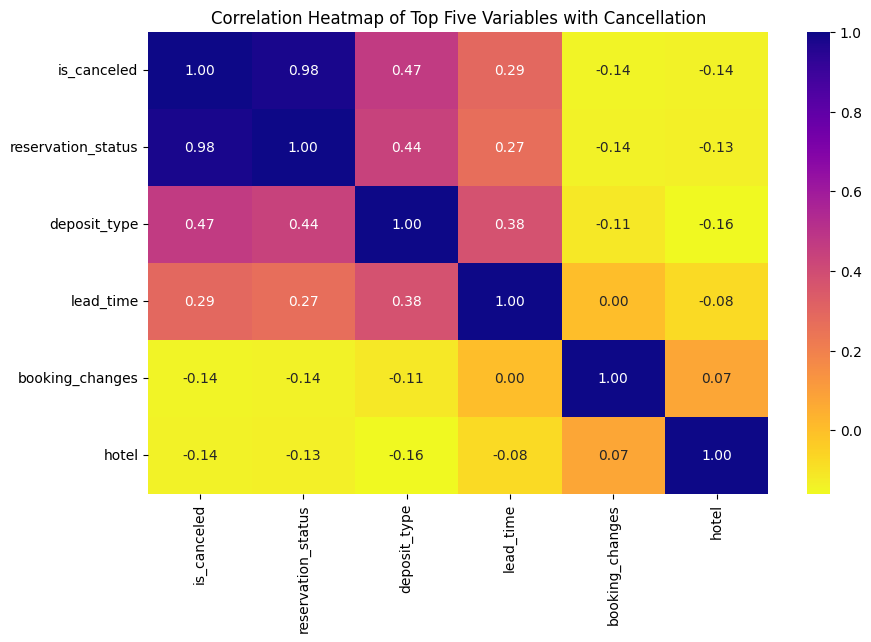

In [ ]:
heatmap_data = df_noDates[['is_canceled'] + list(top_five_variables.index)]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='plasma_r', fmt=".2f")
plt.title('Correlation Heatmap of Top Five Variables with Cancellation')
plt.show()

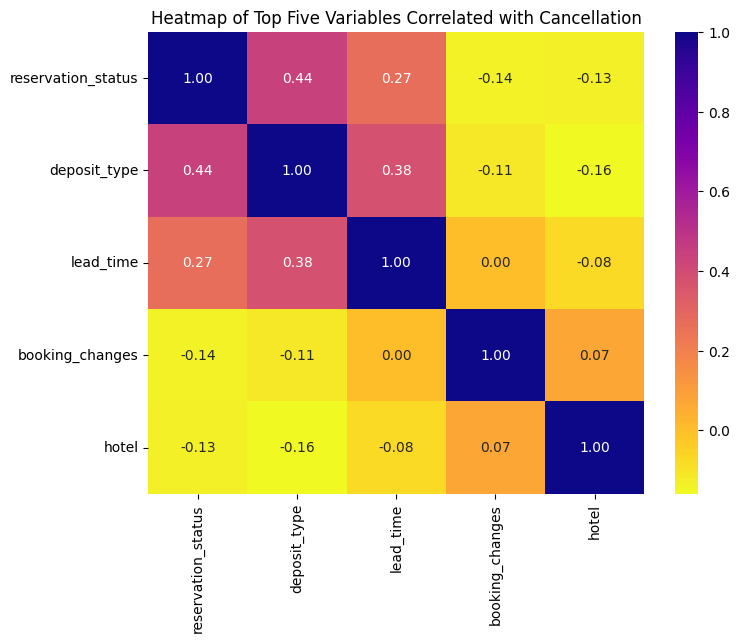

In [ ]:
# top five variables correlation to 'is_canceled'
top_five_correlation_matrix = correlation_matrix.loc[top_five_variables.index, top_five_variables.index]
plt.figure(figsize=(8, 6))
sns.heatmap(top_five_correlation_matrix, annot=True, cmap='plasma_r', fmt=".2f")
plt.title('Heatmap of Top Five Variables Correlated with Cancellation')
plt.show()

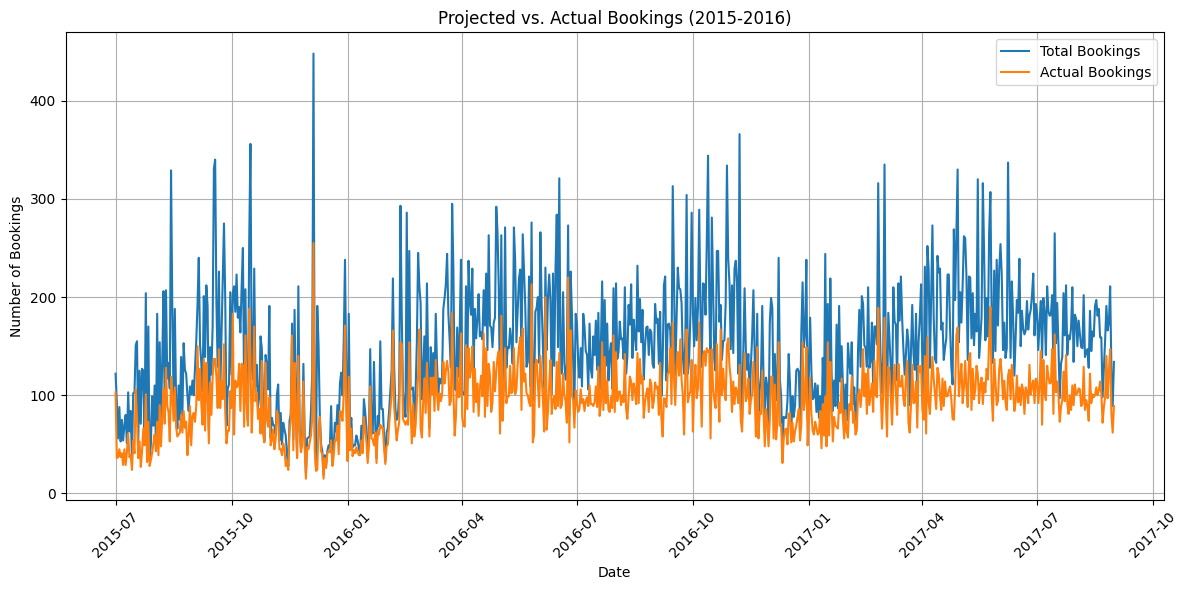

In [ ]:
# total bookings including cancellations, and total fulfilled bookings
bookings_by_date = df.groupby('date_booked').size().reset_index(name='Total Bookings')
actual_bookings_by_date = df[df['is_canceled'] == 0].groupby('date_booked').size().reset_index(name='Actual Bookings')

# merge them for easier plotting
merged_df = pd.merge(bookings_by_date, actual_bookings_by_date, on='date_booked', how='left')
merged_df['Actual Bookings'] = merged_df['Actual Bookings'].fillna(0)

# filter for the two-year period(actually like 26 months)
start_date = date(2015, 1, 1)
end_date = date(2017, 12, 31)
merged_df = merged_df[(merged_df['date_booked'] >= start_date) & (merged_df['date_booked'] <= end_date)]

# line graph
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date_booked'], merged_df['Total Bookings'], label='Total Bookings')
plt.plot(merged_df['date_booked'], merged_df['Actual Bookings'], label='Actual Bookings')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.title('Projected vs. Actual Bookings (2015-2016)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

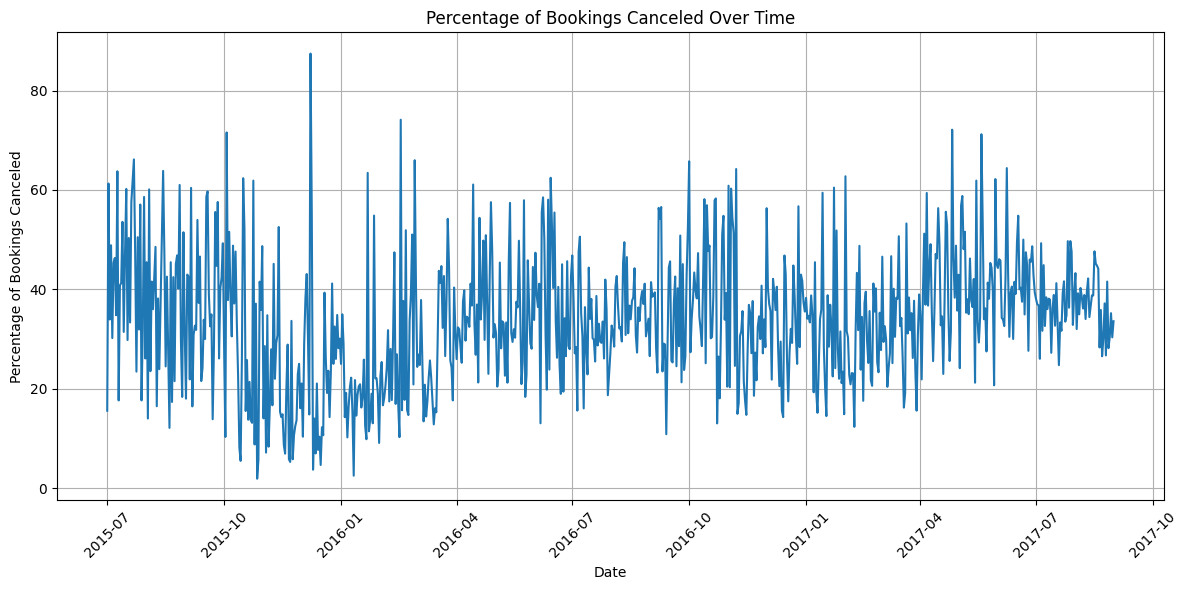

In [ ]:
# Group by date_booked and calculate the percentage of canceled bookings
canceled_bookings_by_date = df.groupby('date_booked')['is_canceled'].mean() * 100

# Plot the percentage of canceled bookings over time
plt.figure(figsize=(12, 6))
plt.plot(canceled_bookings_by_date.index, canceled_bookings_by_date.values)
plt.xlabel('Date')
plt.ylabel('Percentage of Bookings Canceled')
plt.title('Percentage of Bookings Canceled Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

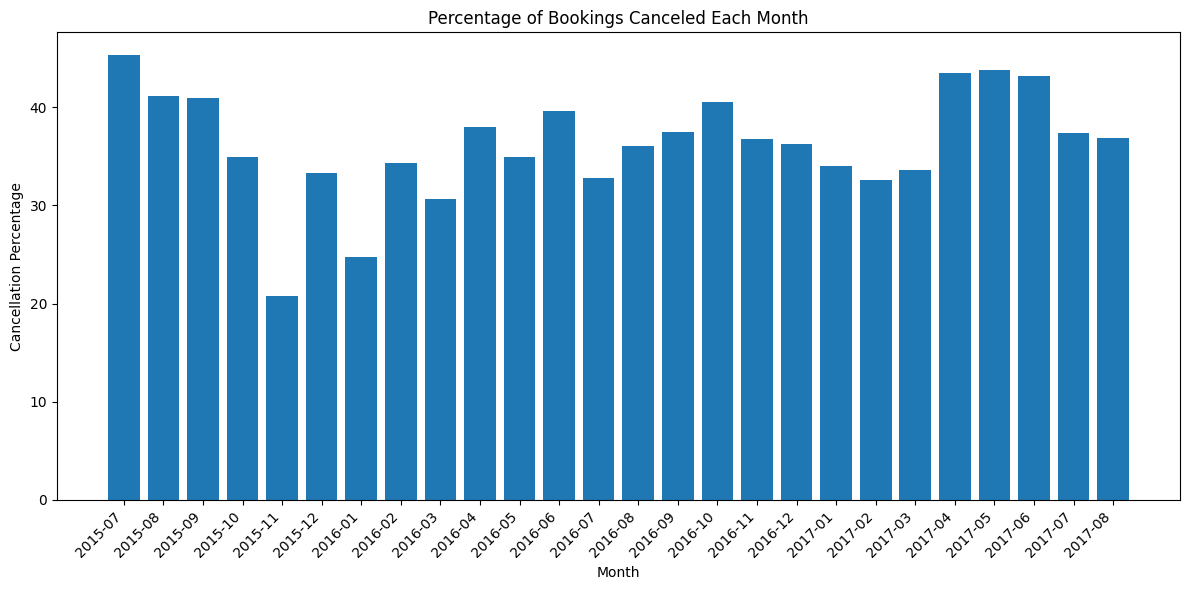

In [ ]:
# group bookings by month for easier visualization
df['year_month'] = pd.to_datetime(df['date_booked']).dt.to_period('M')
canceled_bookings_by_month = df.groupby('year_month')['is_canceled'].mean() * 100

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(canceled_bookings_by_month.index.astype(str), canceled_bookings_by_month.values)
plt.xlabel('Month')
plt.ylabel('Cancellation Percentage')
plt.title('Percentage of Bookings Canceled Each Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Modeling

In [ ]:
df_noDates = df_noDates.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

features = df_noDates.drop(columns = ['is_canceled', 'reservation_status', 'arr'], axis=1)
target = df_noDates['is_canceled']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.3, random_state = 0)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


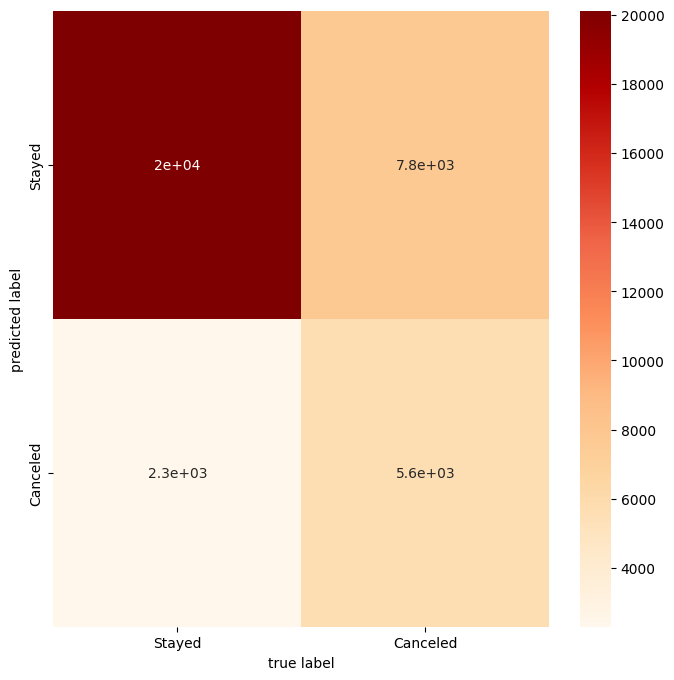

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(fit_intercept = False)
lr.fit(xtrain, ytrain)
ymodel = lr.predict(xtest)
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(ytest, ymodel).T, annot=True, cmap=plt.cm.OrRd, xticklabels=["Stayed", "Canceled"], yticklabels=["Stayed", "Canceled"])
plt.xlabel('true label')
plt.ylabel('predicted label');


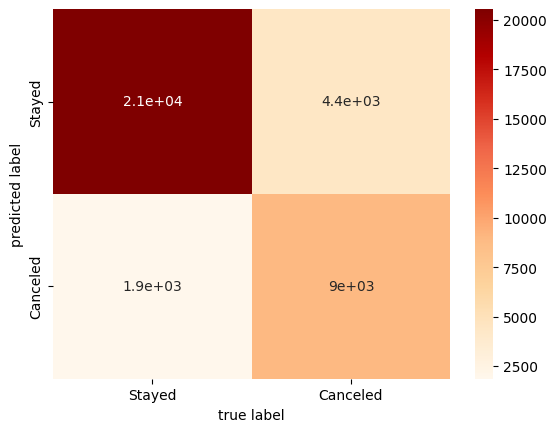

In [ ]:
import sklearn.ensemble
clasificationForest = sklearn.ensemble.RandomForestClassifier( max_features=5, max_samples=.75)
forestModel = clasificationForest.fit(xtrain, ytrain)

ypred = forestModel.predict(xtest)

sns.heatmap(confusion_matrix(ytest, ypred).T, annot=True, cmap=plt.cm.OrRd, xticklabels=["Stayed", "Canceled"], yticklabels=["Stayed", "Canceled"])

plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()


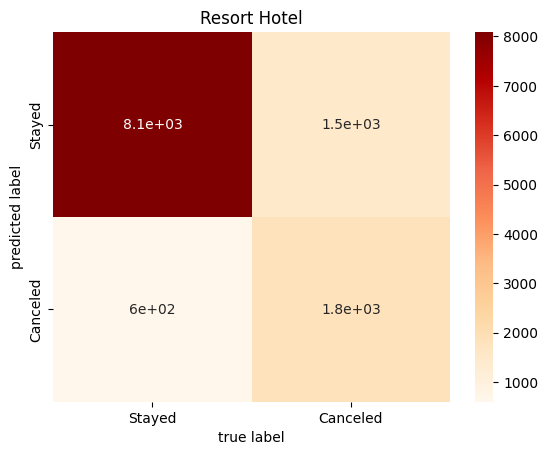

In [ ]:
featuresResort= df_noDates.copy()
featuresResort = featuresResort[featuresResort['hotel'] == 1]
featuresResort = featuresResort.drop(columns = ['hotel'], axis=1)
target = featuresResort['is_canceled']
featuresResort = featuresResort.drop(columns = ['is_canceled', 'reservation_status'], axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(featuresResort, target, test_size = 0.3, random_state = 1)

clasificationForest = sklearn.ensemble.RandomForestClassifier( max_features=5, max_samples=.75)
forestModel = clasificationForest.fit(xtrain, ytrain)

ypred = forestModel.predict(xtest)

sns.heatmap(confusion_matrix(ytest, ypred).T, annot=True, cmap=plt.cm.OrRd, xticklabels=["Stayed", "Canceled"], yticklabels=["Stayed", "Canceled"])

plt.title('Resort Hotel')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_resort = accuracy_score(ytest, ypred)
print("Accuracy report(Resort): ", accuracy_resort)

Accuracy report(Resort):  0.8257613579630554


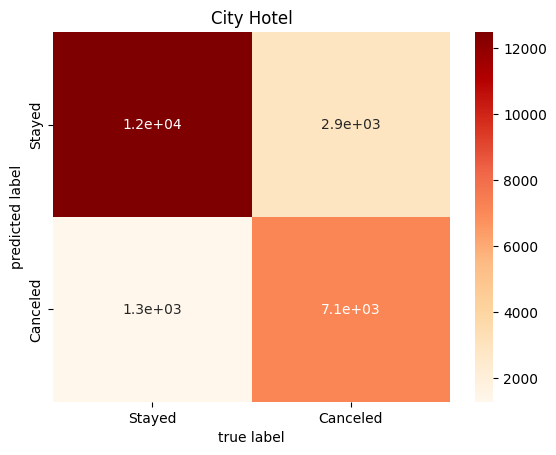

In [ ]:
featuresCity= df_noDates.copy()
featuresCity = featuresCity[featuresCity['hotel'] == 0]
featuresCity = featuresCity.drop(columns = ['hotel'], axis=1)
target = featuresCity['is_canceled']
featuresCity = featuresCity.drop(columns = ['is_canceled', 'reservation_status'], axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(featuresCity, target, test_size = 0.3, random_state = 1)

clasificationForest = sklearn.ensemble.RandomForestClassifier( max_features=5, max_samples=.75)
forestModel = clasificationForest.fit(xtrain, ytrain)

ypred = forestModel.predict(xtest)

sns.heatmap(confusion_matrix(ytest, ypred).T, annot=True, cmap=plt.cm.OrRd, xticklabels=["Stayed", "Canceled"], yticklabels=["Stayed", "Canceled"])

plt.title('City Hotel')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [ ]:
accuracy_city = accuracy_score(ytest, ypred)
print("Accuracy report(City): ", accuracy_city)

Accuracy report(City):  0.8237667030842928


In [ ]:
importances = forestModel.feature_importances_
feature_names = list(featuresCity.columns)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
14,deposit_type,0.222838
0,lead_time,0.193751
17,adr,0.144373
4,arrival_date_day_of_month,0.091790
3,arrival_date_week_number,0.068400
6,stays_in_week_nights,0.051956
11,previous_cancellations,0.050811
2,arrival_date_month,0.035192
5,stays_in_weekend_nights,0.032782
13,booking_changes,0.022507


from matplotlib import pyplot as plt
importance_df['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
importance_df['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)